In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
!pip install split-folders

In [85]:
!pip install torchsummary

In [2]:
import os
import zipfile
import numpy as np
import cv2
import random
import collections
import splitfolders
from glob import glob
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from time import time

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchsummary import summary
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets, models

In [3]:
print(os.getcwd())
print(os.listdir())

c:\Users\DMQA\Desktop\workspace\Today-I-Learned\2021-2-TheoryAndApplicationOfDeepLearning
['archive.zip', 'asl_alphabet_dataset', 'asl_alphabet_test', 'asl_alphabet_train', 'checkpoint_91.74', 'checkpoint_94.29', 'checkpoint_94.78', 'checkpoint_95.13', 'checkpoint_95.64', 'checkpoint_95.66', 'checkpoint_96.02', 'checkpoint_96.53', 'checkpoint_96.59', 'checkpoint_96.66', 'Resnet.ipynb', 'resnet50_checkpoint_90.48', 'resnet50_checkpoint_93.00', 'resnet50_checkpoint_93.61', 'resnet50_checkpoint_94.05', 'resnet50_checkpoint_94.91', 'resnet50_checkpoint_95.40', 'resnet50_checkpoint_95.45', 'resnet50_checkpoint_95.68', 'resnet50_checkpoint_95.92', 'resnet50_checkpoint_97.21', 'Resnet_HW.ipynb']


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [5]:
path_to_zipfile = os.getcwd() + '/archive.zip'
directory_to_extract = os.getcwd()

with zipfile.ZipFile(path_to_zipfile, 'r') as zip_ref:
  zip_ref.extractall(directory_to_extract)

In [5]:
def plot_three_samples(letter):
    print("Samples images for letter", letter)
    path = 'C:/Users/DMQA/Desktop/workspace/Today-I-Learned/2021-2-TheoryAndApplicationOfDeepLearning/asl_alphabet_train/asl_alphabet_train/'
    img_path = path + letter + '/**'
    path_contents = glob(img_path)
    
    plt.figure(figsize=(16,16))
    imgs = random.sample(path_contents, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    return

Samples images for letter A


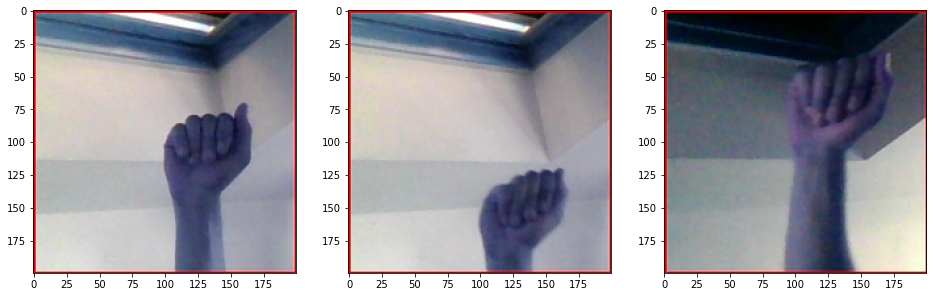

In [6]:
plot_three_samples('A')

In [6]:
splitfolders.ratio(os.getcwd()+'/asl_alphabet_train/asl_alphabet_train', output=os.getcwd()+'/asl_alphabet_dataset', seed=1337, ratio=(0.7,0.2,0.1))

Copying files: 87000 files [06:23, 226.61 files/s]


In [7]:
train_data_path = os.getcwd()+'/asl_alphabet_dataset/train'
test_data_path = os.getcwd()+'/asl_alphabet_dataset/test'
val_data_path = os.getcwd()+'/asl_alphabet_dataset/val'

train_transformer = transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                        transforms.Normalize([.5,.5,.5],[.5,.5,.5])])
val_transformer = transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                        transforms.Normalize([.5,.5,.5],[.5,.5,.5])])
test_transformer = transforms.Compose([transforms.Resize(224), transforms.RandomHorizontalFlip(),transforms.ToTensor(),
                                        transforms.Normalize([.5,.5,.5],[.5,.5,.5])])

train_dataset = datasets.ImageFolder(train_data_path, transform=train_transformer)
test_dataset = datasets.ImageFolder(test_data_path, transform=test_transformer)
val_dataset = datasets.ImageFolder(val_data_path, transform=val_transformer)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=True, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True, drop_last=True)

print(dict(collections.Counter(train_dataset.targets)))
print(dict(collections.Counter(test_dataset.targets)))
print(dict(collections.Counter(val_dataset.targets)))


{0: 2100, 1: 2100, 2: 2100, 3: 2100, 4: 2100, 5: 2100, 6: 2100, 7: 2100, 8: 2100, 9: 2100, 10: 2100, 11: 2100, 12: 2100, 13: 2100, 14: 2100, 15: 2100, 16: 2100, 17: 2100, 18: 2100, 19: 2100, 20: 2100, 21: 2100, 22: 2100, 23: 2100, 24: 2100, 25: 2100, 26: 2100, 27: 2100, 28: 2100}
{0: 300, 1: 300, 2: 300, 3: 300, 4: 300, 5: 300, 6: 300, 7: 300, 8: 300, 9: 300, 10: 300, 11: 300, 12: 300, 13: 300, 14: 300, 15: 300, 16: 300, 17: 300, 18: 300, 19: 300, 20: 300, 21: 300, 22: 300, 23: 300, 24: 300, 25: 300, 26: 300, 27: 300, 28: 300}
{0: 600, 1: 600, 2: 600, 3: 600, 4: 600, 5: 600, 6: 600, 7: 600, 8: 600, 9: 600, 10: 600, 11: 600, 12: 600, 13: 600, 14: 600, 15: 600, 16: 600, 17: 600, 18: 600, 19: 600, 20: 600, 21: 600, 22: 600, 23: 600, 24: 600, 25: 600, 26: 600, 27: 600, 28: 600}


In [8]:
resnet_18 = models.resnet18(pretrained=True).cuda()
resnet_50 = models.resnet50(pretrained=True).cuda()

print('***************************Resnet 18***************************')
summary(resnet_18,(3,224,224))

print('\n'+'***************************Resnet 50***************************')
summary(resnet_50,(3,224,224))

***************************Resnet 18***************************


C:\Users\DMQA\anaconda3\envs\main\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [9]:
for param in resnet_18.parameters():
  param.requires_grad = True

for param in resnet_50.parameters():
  param.requires_grad = True

resnet18_in_features = resnet_18.fc.in_features
resnet50_in_featuers = resnet_50.fc.in_features

new_resnet18_fc = torch.nn.Sequential(nn.Linear(in_features=resnet18_in_features, out_features=29, bias=True))
new_resnet50_fc = torch.nn.Sequential(nn.Linear(in_features=resnet50_in_featuers, out_features=1000, bias=True), nn.ReLU(inplace=True), nn.Linear(in_features=1000, out_features=29, bias=True))

resnet_18.fc = new_resnet18_fc
resnet_50.fc = new_resnet50_fc

criterion = nn.CrossEntropyLoss()
resnet18_optimizer = optim.Adam(resnet_18.parameters(), lr = 0.001)
resnet50_optimizer = optim.Adam(resnet_50.parameters(), lr = 0.001)


In [10]:
r18_print_every = 1000
r18_steps = 0
r18_train_losses, r18_val_losses = [], []

resnet_18.to(device)
for epoch in tqdm(range(10)):
    r18_iterations = 0
    r18_running_loss = 0
    r18_correct_train = 0
    r18_total_train = 0
    r18_start_time = time()
    
    resnet_18.train()
    for i, (images, labels) in enumerate(train_loader):
        r18_steps += 1
        images = images.to(device)
        labels = labels.to(device)
            
        # Forward pass
        output = resnet_18(images)
        r18_loss = criterion(output, labels)
    
        r18_correct_train += (torch.max(output, dim=1)[1] == labels).sum()
        r18_total_train += labels.size(0)
        
        # Backward and optimize
        resnet18_optimizer.zero_grad()
        r18_loss.backward()
        resnet18_optimizer.step()
        
        r18_iterations += 1
        r18_running_loss += r18_loss.item()
        
        if r18_steps % r18_print_every == 0:
            print(f'Epoch [{epoch + 1}]/[{10}]. Batch [{i + 1}]/[{len(train_loader)}]. Train loss {r18_running_loss / r18_steps}.', end=' ')
            print(f'Train acc {r18_correct_train / r18_total_train * 100}.', end=' ')
            with torch.no_grad():
                resnet_18.eval()
                r18_correct_val, r18_total_val = 0, 0
                r18_val_loss = 0
                for images, labels in val_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    output = resnet_18(images)
                    r18_loss = criterion(output, labels)
                    r18_val_loss += r18_loss.item()

                    r18_correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                    r18_total_val += labels.size(0)

            print(f'Val loss {r18_val_loss / len(val_loader)}. Val acc {r18_correct_val / r18_total_val * 100}')

            r18_train_losses.append(r18_running_loss / r18_total_train)
            r18_val_losses.append(r18_val_loss / r18_total_val)
        
        
    print(f'Epoch took {time() - r18_start_time}') 
    #torch.save(resnet_18, f'checkpoint_{r18_correct_val / r18_total_val * 100:.2f}')

    #https://www.kaggle.com/julichitai/asl-alphabet-classification-using-pytorch

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1]/[10]. Batch [1000]/[3806]. Train loss 0.40814982169494035. Train acc 87.51250457763672. Val loss 0.11748089318459497. Val acc 96.42363739013672
Epoch [1]/[10]. Batch [2000]/[3806]. Train loss 1.8814299264871515. Train acc 45.64375305175781. Val loss 3.3675228838758287. Val acc 3.449862003326416
Epoch [1]/[10]. Batch [3000]/[3806]. Train loss 2.3768677276587113. Train acc 31.53333282470703. Val loss 3.3675245523672097. Val acc 3.449862003326416


 10%|█         | 1/10 [11:47<1:46:09, 707.71s/it]

Epoch took 707.7125625610352
Epoch [2]/[10]. Batch [194]/[3806]. Train loss 0.04290299823693931. Train acc 73.51803588867188. Val loss 0.31940002648353494. Val acc 87.63224792480469
Epoch [2]/[10]. Batch [1194]/[3806]. Train loss 0.7041061120927334. Train acc 15.56742000579834. Val loss 3.3676699216802293. Val acc 3.449862003326416
Epoch [2]/[10]. Batch [2194]/[3806]. Train loss 1.1480793156971534. Train acc 9.961828231811523. Val loss 3.3674885162872905. Val acc 3.4441120624542236
Epoch [2]/[10]. Batch [3194]/[3806]. Train loss 1.4651872660730567. Train acc 7.938713550567627. Val loss 3.3674424609243045. Val acc 3.449862003326416


 20%|██        | 2/10 [25:05<1:41:27, 760.90s/it]

Epoch took 798.1242632865906
Epoch [3]/[10]. Batch [388]/[3806]. Train loss 0.024640873521682805. Train acc 84.47164916992188. Val loss 0.12183339184851805. Val acc 95.60142517089844
Epoch [3]/[10]. Batch [1388]/[3806]. Train loss 0.041205318079404404. Train acc 91.57060241699219. Val loss 0.07228462527595052. Val acc 97.60234069824219
Epoch [3]/[10]. Batch [2388]/[3806]. Train loss 0.04280314617645163. Train acc 94.37551879882812. Val loss 0.011624142050177122. Val acc 99.64926147460938
Epoch [3]/[10]. Batch [3388]/[3806]. Train loss 0.044614112693814025. Train acc 95.46561431884766. Val loss 0.0977079999629077. Val acc 96.96411895751953


 30%|███       | 3/10 [37:50<1:28:56, 762.42s/it]

Epoch took 764.2387313842773
Epoch [4]/[10]. Batch [582]/[3806]. Train loss 0.001897450311966774. Train acc 98.76502990722656. Val loss 0.00465395251299094. Val acc 99.89649963378906
Epoch [4]/[10]. Batch [1582]/[3806]. Train loss 0.005780953311866903. Train acc 98.58170318603516. Val loss 0.006869542264982398. Val acc 99.81600952148438
Epoch [4]/[10]. Batch [2582]/[3806]. Train loss 0.00825089734165988. Train acc 98.67835235595703. Val loss 0.027902722420267232. Val acc 99.1662826538086
Epoch [4]/[10]. Batch [3582]/[3806]. Train loss 0.010028246003765753. Train acc 98.78907775878906. Val loss 0.013997375285907221. Val acc 99.5400161743164


 40%|████      | 4/10 [50:35<1:16:21, 763.58s/it]

Epoch took 765.34503865242
Epoch [5]/[10]. Batch [776]/[3806]. Train loss 0.001516897197792673. Train acc 99.01739501953125. Val loss 0.023132072638001017. Val acc 99.23527526855469
Epoch [5]/[10]. Batch [1776]/[3806]. Train loss 0.0033324491649150984. Train acc 99.04631042480469. Val loss 0.03126008756248436. Val acc 98.86729431152344
Epoch [5]/[10]. Batch [2776]/[3806]. Train loss 0.004830958947037277. Train acc 99.0656509399414. Val loss 0.05564475523250251. Val acc 98.1313247680664
Epoch [5]/[10]. Batch [3776]/[3806]. Train loss 0.005795203606070738. Train acc 99.135986328125. Val loss 0.0037674782094430964. Val acc 99.8792495727539


 50%|█████     | 5/10 [1:02:59<1:03:01, 756.38s/it]

Epoch took 743.6274566650391
Epoch [6]/[10]. Batch [970]/[3806]. Train loss 0.0012639026626693748. Train acc 99.18814849853516. Val loss 0.004976312191508533. Val acc 99.81600952148438
Epoch [6]/[10]. Batch [1970]/[3806]. Train loss 0.002291870053165556. Train acc 99.27664947509766. Val loss 0.02669067593609228. Val acc 99.23527526855469
Epoch [6]/[10]. Batch [2970]/[3806]. Train loss 0.00364844680991259. Train acc 99.21505737304688. Val loss 0.018685771400960074. Val acc 99.49977111816406


 60%|██████    | 6/10 [1:14:03<48:20, 725.10s/it]  

Epoch took 664.3674862384796
Epoch [7]/[10]. Batch [164]/[3806]. Train loss 0.00018608608904864725. Train acc 99.27590942382812. Val loss 0.008955211886197086. Val acc 99.70101165771484
Epoch [7]/[10]. Batch [1164]/[3806]. Train loss 0.0005416964915425169. Train acc 99.66172790527344. Val loss 0.002495614713965239. Val acc 99.94824981689453
Epoch [7]/[10]. Batch [2164]/[3806]. Train loss 0.0012352325908884297. Train acc 99.58121490478516. Val loss 0.004085196213521989. Val acc 99.87350463867188
Epoch [7]/[10]. Batch [3164]/[3806]. Train loss 0.0019501931035727277. Train acc 99.55159759521484. Val loss 0.012196978547618415. Val acc 99.59175872802734


 70%|███████   | 7/10 [1:26:15<36:22, 727.41s/it]

Epoch took 732.1839983463287
Epoch [8]/[10]. Batch [358]/[3806]. Train loss 0.00045464644681538223. Train acc 98.88268280029297. Val loss 0.015690395757868035. Val acc 99.51702117919922
Epoch [8]/[10]. Batch [1358]/[3806]. Train loss 0.0009542080191446094. Train acc 99.39249420166016. Val loss 0.010452169202607673. Val acc 99.58601379394531
Epoch [8]/[10]. Batch [2358]/[3806]. Train loss 0.0013413609427366357. Train acc 99.49639129638672. Val loss 0.012837752760269982. Val acc 99.5400161743164
Epoch [8]/[10]. Batch [3358]/[3806]. Train loss 0.0017737577683028622. Train acc 99.52352905273438. Val loss 0.012873412026581866. Val acc 99.6090087890625


 80%|████████  | 8/10 [1:38:26<24:17, 728.53s/it]

Epoch took 730.9217209815979
Epoch [9]/[10]. Batch [552]/[3806]. Train loss 0.00020058385673521313. Train acc 99.59239196777344. Val loss 0.0006720011748564835. Val acc 99.97124481201172
Epoch [9]/[10]. Batch [1552]/[3806]. Train loss 0.0004970220441272142. Train acc 99.71004486083984. Val loss 0.002695090015506299. Val acc 99.95399475097656
Epoch [9]/[10]. Batch [2552]/[3806]. Train loss 0.00114999394535704. Train acc 99.60814666748047. Val loss 0.018692880327721397. Val acc 99.45951843261719
Epoch [9]/[10]. Batch [3552]/[3806]. Train loss 0.0012927876033483772. Train acc 99.67976379394531. Val loss 0.01817642645423982. Val acc 99.47676849365234


 90%|█████████ | 9/10 [1:50:31<12:07, 727.44s/it]

Epoch took 725.0310914516449
Epoch [10]/[10]. Batch [746]/[3806]. Train loss 0.0006403486657635735. Train acc 99.24598693847656. Val loss 0.005528349496669994. Val acc 99.86199951171875
Epoch [10]/[10]. Batch [1746]/[3806]. Train loss 0.0008040842078446231. Train acc 99.5776138305664. Val loss 0.0028768483448348976. Val acc 99.90225219726562
Epoch [10]/[10]. Batch [2746]/[3806]. Train loss 0.0012936978607419004. Train acc 99.54934692382812. Val loss 0.01140632234599695. Val acc 99.71250915527344
Epoch [10]/[10]. Batch [3746]/[3806]. Train loss 0.001508107074682234. Train acc 99.60791778564453. Val loss 0.006417142020747312. Val acc 99.75276184082031


100%|██████████| 10/10 [2:02:35<00:00, 735.59s/it]

Epoch took 724.3095049858093


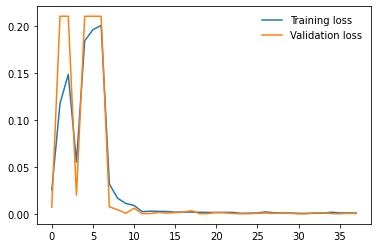

In [11]:
plt.plot(r18_train_losses, label='Training loss')
plt.plot(r18_val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [12]:
with torch.no_grad():
  resnet_18.eval()
  r18_correct_test, r18_total_test = 0, 0
  r18_test_loss = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    output = resnet_18(images)
    r18_cost = criterion(output, labels)
    r18_test_loss += r18_cost.item()

  r18_correct_test += (torch.max(output, dim=1)[1] == labels).sum()
  r18_total_test += labels.size(0)

print(f'Test loss {r18_test_loss / len(test_loader)}. Test acc {r18_correct_test / r18_total_test * 100}')

Test loss 0.015555775310347074. Test acc 100.0


In [13]:
r50_print_every = 1000
r50_steps = 0
r50_train_losses, r50_val_losses = [], []

resnet_50.to(device)
for epoch in tqdm(range(10)):
    r50_iterations = 0
    r50_running_loss = 0
    r50_correct_train = 0
    r50_total_train = 0
    r50_start_time = time()
    
    resnet_50.train()
    for i, (images, labels) in enumerate(train_loader):
        r50_steps += 1
        images = images.to(device)
        labels = labels.to(device)
            
        # Forward pass
        output = resnet_50(images)
        r50_loss = criterion(output, labels)
    
        r50_correct_train += (torch.max(output, dim=1)[1] == labels).sum()
        r50_total_train += labels.size(0)
        
        # Backward and optimize
        resnet50_optimizer.zero_grad()
        r50_loss.backward()
        resnet50_optimizer.step()
        
        r50_iterations += 1
        r50_running_loss += r50_loss.item()
        
        if r50_steps % r50_print_every == 0:
            print(f'Epoch [{epoch + 1}]/[{10}]. Batch [{i + 1}]/[{len(train_loader)}]. Train loss {r50_running_loss / r50_steps}.', end=' ')
            print(f'Train acc {r50_correct_train / r50_total_train * 100}.', end=' ')
            with torch.no_grad():
                resnet_50.eval()
                r50_correct_val, r50_total_val = 0, 0
                r50_val_loss = 0
                for images, labels in val_loader:
                    images = images.to(device)
                    labels = labels.to(device)
                    output = resnet_50(images)
                    r50_loss = criterion(output, labels)
                    r50_val_loss += r50_loss.item()

                    r50_correct_val += (torch.max(output, dim=1)[1] == labels).sum()
                    r50_total_val += labels.size(0)

            print(f'Val loss {r50_val_loss / len(val_loader)}. Val acc {r50_correct_val / r50_total_val * 100}')

            r50_train_losses.append(r50_running_loss / r50_total_train)
            r50_val_losses.append(r50_val_loss / r50_total_val)
        
        
    print(f'Epoch took {time() - r50_start_time}') 
    #torch.save(resnet_50, f'resnet50_checkpoint_{r50_correct_val / r50_total_val * 100:.2f}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1]/[10]. Batch [1000]/[3806]. Train loss 3.0080548634529114. Train acc 7.406250476837158. Val loss 2.6164464948368162. Val acc 12.005518913269043
Epoch [1]/[10]. Batch [2000]/[3806]. Train loss 2.8731356128454206. Train acc 9.637500762939453. Val loss 2.607529895724566. Val acc 15.926861763000488
Epoch [1]/[10]. Batch [3000]/[3806]. Train loss 2.6840026190678277. Train acc 13.235417366027832. Val loss 2.032545891286259. Val acc 27.51839828491211


 10%|█         | 1/10 [22:29<3:22:21, 1349.06s/it]

Epoch took 1349.0559856891632
Epoch [2]/[10]. Batch [194]/[3806]. Train loss 0.13077700689435004. Train acc 13.98195743560791. Val loss 2.323230224677808. Val acc 20.313936233520508
Epoch [2]/[10]. Batch [1194]/[3806]. Train loss 0.4857029741048813. Train acc 28.920644760131836. Val loss 1.679227976538001. Val acc 37.53449630737305
Epoch [2]/[10]. Batch [2194]/[3806]. Train loss 0.6476428400476774. Train acc 36.63684844970703. Val loss 1.2952448970808714. Val acc 52.62763977050781
Epoch [2]/[10]. Batch [3194]/[3806]. Train loss 0.7276470397412776. Train acc 42.370460510253906. Val loss 1.040354673425978. Val acc 61.56278991699219


 20%|██        | 2/10 [46:52<3:08:52, 1416.57s/it]

Epoch took 1463.834302663803
Epoch [3]/[10]. Batch [388]/[3806]. Train loss 0.08440019224584103. Train acc 40.02899169921875. Val loss 1.173874818631675. Val acc 57.951934814453125
Epoch [3]/[10]. Batch [1388]/[3806]. Train loss 0.18259835923049186. Train acc 57.492794036865234. Val loss 0.7103186331847006. Val acc 74.66075897216797
Epoch [3]/[10]. Batch [2388]/[3806]. Train loss 0.2299797379463911. Train acc 65.25596618652344. Val loss 0.6952450599764725. Val acc 75.8337173461914
Epoch [3]/[10]. Batch [3388]/[3806]. Train loss 0.25265004149248654. Train acc 70.36968231201172. Val loss 0.3929728229359656. Val acc 85.78081512451172


 30%|███       | 3/10 [1:11:18<2:47:51, 1438.75s/it]

Epoch took 1465.1295607089996
Epoch [4]/[10]. Batch [582]/[3806]. Train loss 0.03868838326260447. Train acc 71.71392059326172. Val loss 0.4122707205923084. Val acc 85.55657196044922
Epoch [4]/[10]. Batch [1582]/[3806]. Train loss 0.06254372132537313. Train acc 81.80705261230469. Val loss 0.2513555379733512. Val acc 90.84061431884766
Epoch [4]/[10]. Batch [2582]/[3806]. Train loss 0.07351345187711662. Train acc 85.98712158203125. Val loss 0.3609658828306782. Val acc 87.58049774169922
Epoch [4]/[10]. Batch [3582]/[3806]. Train loss 0.0806741158567757. Train acc 88.1717529296875. Val loss 0.14523882325010404. Val acc 95.1471939086914


 40%|████      | 4/10 [1:35:44<2:24:57, 1449.55s/it]

Epoch took 1466.1090006828308
Epoch [5]/[10]. Batch [776]/[3806]. Train loss 0.014658027677796781. Train acc 89.57795715332031. Val loss 0.11541456150459922. Val acc 96.19364929199219
Epoch [5]/[10]. Batch [1776]/[3806]. Train loss 0.022939681796957087. Train acc 92.48310852050781. Val loss 0.160469276439647. Val acc 94.18122863769531
Epoch [5]/[10]. Batch [2776]/[3806]. Train loss 0.02820504503412505. Train acc 93.78826904296875. Val loss 0.07163702449294385. Val acc 97.3666000366211
Epoch [5]/[10]. Batch [3776]/[3806]. Train loss 0.03177824475360639. Train acc 94.57262420654297. Val loss 0.08553623411187661. Val acc 97.14810943603516


 50%|█████     | 5/10 [2:00:10<2:01:18, 1455.74s/it]

Epoch took 1466.7056593894958
Epoch [6]/[10]. Batch [970]/[3806]. Train loss 0.007759076672291849. Train acc 94.76805114746094. Val loss 0.041167853556099164. Val acc 98.83279418945312
Epoch [6]/[10]. Batch [1970]/[3806]. Train loss 0.011588676400453551. Train acc 95.90736389160156. Val loss 0.04399562159585781. Val acc 98.56255340576172
Epoch [6]/[10]. Batch [2970]/[3806]. Train loss 0.015410965298485445. Train acc 96.24368286132812. Val loss 0.06932890124688836. Val acc 97.60809326171875


 60%|██████    | 6/10 [2:22:41<1:34:39, 1419.96s/it]

Epoch took 1350.5041570663452
Epoch [7]/[10]. Batch [164]/[3806]. Train loss 0.0008785310079870017. Train acc 95.76981353759766. Val loss 0.044189172150676845. Val acc 98.706298828125
Epoch [7]/[10]. Batch [1164]/[3806]. Train loss 0.0030392032046541997. Train acc 98.01332092285156. Val loss 0.042594947992626316. Val acc 98.52806091308594
Epoch [7]/[10]. Batch [2164]/[3806]. Train loss 0.005146957639762368. Train acc 98.0880355834961. Val loss 0.0211904787624394. Val acc 99.43077087402344
Epoch [7]/[10]. Batch [3164]/[3806]. Train loss 0.007252255547598207. Train acc 98.06416320800781. Val loss 0.026909762297697343. Val acc 99.12603759765625


 70%|███████   | 7/10 [2:47:05<1:11:43, 1434.34s/it]

Epoch took 1463.9432406425476
Epoch [8]/[10]. Batch [358]/[3806]. Train loss 0.0013933498441172695. Train acc 96.6829605102539. Val loss 0.03269252989454222. Val acc 99.02828216552734
Epoch [8]/[10]. Batch [1358]/[3806]. Train loss 0.0026692024287124565. Train acc 98.22808837890625. Val loss 0.04935059733259503. Val acc 98.57980346679688
Epoch [8]/[10]. Batch [2358]/[3806]. Train loss 0.004058701784659206. Train acc 98.41497039794922. Val loss 0.028649123657950623. Val acc 99.10303497314453
Epoch [8]/[10]. Batch [3358]/[3806]. Train loss 0.005672401557296871. Train acc 98.3900375366211. Val loss 0.0720195247821802. Val acc 97.63108825683594


 80%|████████  | 8/10 [3:11:29<48:07, 1443.91s/it]  

Epoch took 1464.3919835090637
Epoch [9]/[10]. Batch [552]/[3806]. Train loss 0.0014052165982176386. Train acc 97.33922576904297. Val loss 0.00754617354078119. Val acc 99.82750701904297
Epoch [9]/[10]. Batch [1552]/[3806]. Train loss 0.002262365570392646. Train acc 98.46569061279297. Val loss 0.0033799609168881197. Val acc 99.89649963378906
Epoch [9]/[10]. Batch [2552]/[3806]. Train loss 0.00352412020316557. Train acc 98.54280853271484. Val loss 0.010084802679221115. Val acc 99.72400665283203
Epoch [9]/[10]. Batch [3552]/[3806]. Train loss 0.004410391603155939. Train acc 98.67328643798828. Val loss 0.007855589093805732. Val acc 99.7642593383789


 90%|█████████ | 9/10 [3:35:55<24:10, 1450.83s/it]

Epoch took 1466.0680239200592
Epoch [10]/[10]. Batch [746]/[3806]. Train loss 0.0013390148802236322. Train acc 98.05630493164062. Val loss 0.019021771617094712. Val acc 99.37902069091797
Epoch [10]/[10]. Batch [1746]/[3806]. Train loss 0.002792438894272613. Train acc 98.33906555175781. Val loss 0.010323281690748198. Val acc 99.70675659179688
Epoch [10]/[10]. Batch [2746]/[3806]. Train loss 0.003482881987257831. Train acc 98.6343765258789. Val loss 0.0172665634040419. Val acc 99.36752319335938
Epoch [10]/[10]. Batch [3746]/[3806]. Train loss 0.004175672664333493. Train acc 98.76201629638672. Val loss 0.023572519243417734. Val acc 99.17203521728516


100%|██████████| 10/10 [4:00:22<00:00, 1442.25s/it]

Epoch took 1466.7306451797485


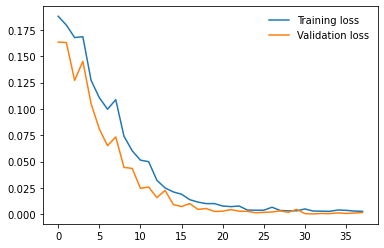

In [14]:
plt.plot(r50_train_losses, label='Training loss')
plt.plot(r50_val_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()

In [15]:
with torch.no_grad():
  resnet_50.eval()
  r50_correct_test, r50_total_test = 0, 0
  r50_test_loss = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    output = resnet_50(images)
    r50_test_cost = criterion(output, labels)
    r50_test_loss += r50_test_cost.item()

  r50_correct_test += (torch.max(output, dim=1)[1] == labels).sum()
  r50_total_test += labels.size(0)

print(f'Test loss {r50_test_loss / len(test_loader)}. Test acc {r50_correct_test / r50_total_test * 100}')

Test loss 0.01352624007057337. Test acc 100.0


In [ ]:
#https://deep-learning-study.tistory.com/534